In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
img_dir = '../images/'
data_dir = '../ml_data/'

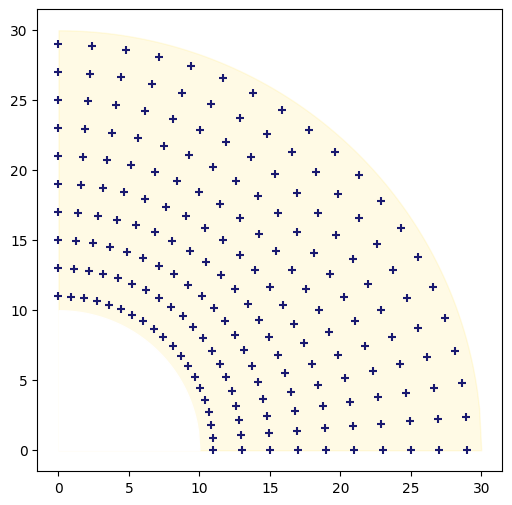

In [43]:
# Preaper training data (input)
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)


x = np.linspace(0, l1+l2, 200)
plt.figure(figsize=(6, 6))
plt.fill_between(x, f1(x), 0, color='#FFD700', alpha=0.1)#畫圖底色
x = np.linspace(0, l2, 100)
plt.fill_between(x, f2(x), 0, color='white')

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))  # 將L cos(T)弄成一豎一橫的向量
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))  # 矩陣乘法＠

plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')  # 拉直 才能畫出來
plt.show()


In [4]:
l1=l.reshape(-1,1)

In [5]:
t1=np.cos(t.reshape(1,-1)) 

# ANN 第一象限 機器人手臂位置

Root Mean square error is 0.0335


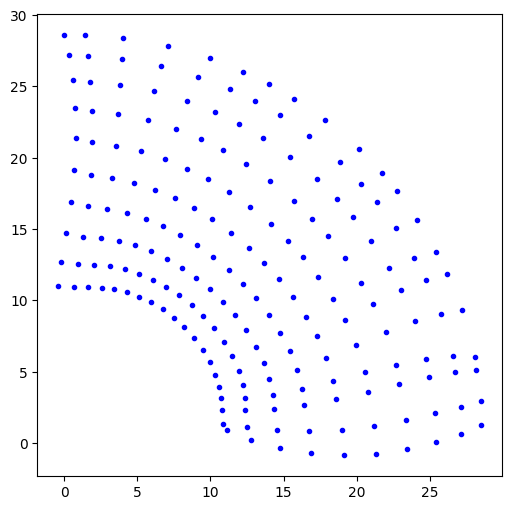

In [23]:
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) -  np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] #200*2 座標
OutputY = np.c_[theta1, theta2] #200*2 theta
hidden_layers = (40, )#隱藏層數量
solver = 'lbfgs' # the best for robot data 最常用的
# solver = ’sgd’ (針對類別)
# solver = ’adam’

# Multi-Layer Perceptron Regressor
# default activation = ’relu’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, hidden_layer_sizes = hidden_layers, 
verbose = False, activation = 'logistic',  tol=1e-6, random_state = 0) #max_iter最大次數
#activation激發函數
#verbose印出來

mlp_reg.fit(InputX, OutputY) # Training ...
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values 
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat) 
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
plt.figure(figsize=(6,6))
plt.scatter(x_hat,y_hat,marker='.',color='blue')


R square = 0.9972
Root Mean squared error is 0.0335
The loss function is 0.0007
Number of interations : 2526
Root Mean square error is 0.0335


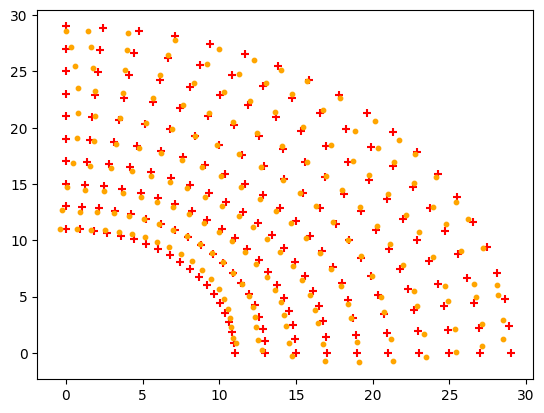

In [31]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Preaper training data (input)
l1, l2 = 20, 10
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))

plt.scatter(X.ravel(), Y.ravel(), marker='+', color='red')

l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - np.arctan(l2 *
                                                    np.sin(theta2)/(l1+l2*np.cos(theta2)))

# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()]  # 合併起來
OutputY = np.c_[theta1, theta2]
hidden_layers = (40, )  # 隱藏層層數
solver = 'lbfgs'  # the best for robot data # solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                       activation='logistic',  tol=1e-6, random_state=0)  # default activation = ’relu’

mlp_reg.fit(InputX, OutputY)  # Training ...
OutputY_hat = mlp_reg.predict(InputX)  # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
R_square = mlp_reg.score(InputX, OutputY)
print('R square = {:.4f}'.format(R_square))
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean squared error is {:.4f}'.format(rmse))
LossFun = mlp_reg.loss_
print('The loss function is {:.4f}'.format(LossFun))
print("Number of interations : {}".format(mlp_reg.n_iter_))
plt.scatter(x_hat.ravel(), y_hat.ravel(), marker='o',
            color='orange', s=10)  # 畫出預測值的點
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))


# 資料的生成

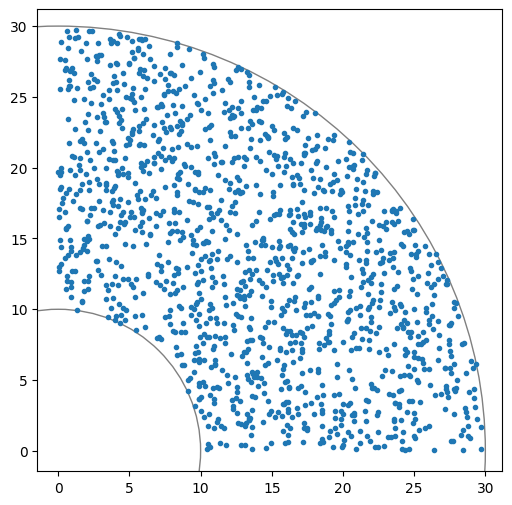

In [9]:
import numpy as np
from scipy.stats import uniform
from scipy.special import gammainc

radius_in, radius_out =10, 30
center = np.array([0, 0])
X = uniform.rvs(loc = 0, scale = radius_out, size=(2000, 2)) 
d = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
Idx = (d < radius_out) & (d > radius_in)#只要範圍內
TrainData = X[(d < radius_out) & (d > radius_in), :]#只要第一象限
fig =plt.figure(figsize=(6,6))
ax = fig.gca()
ax.add_artist(plt.Circle(center,radius_out,fill=False,color='0.5'))
ax.add_artist(plt.Circle(center,radius_in,fill=False,color='0.5'))
plt.scatter(TrainData [:,0],TrainData [:,1],marker='.') #可當下一段的訓練資料
plt.show()


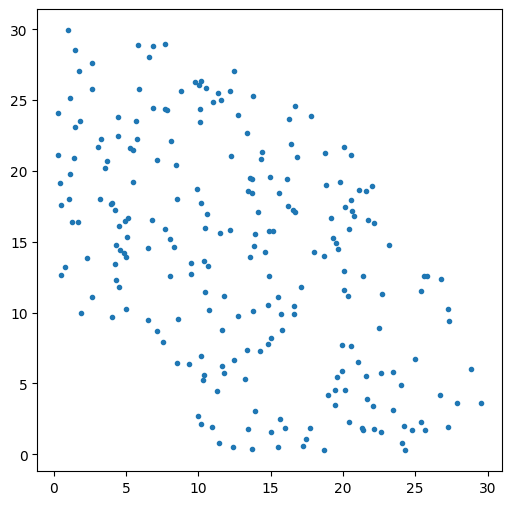

In [25]:
import numpy as np
from scipy.special import gammainc


def randsphere(center, radius, n_per_sphere):
    # generate random numbers in a n−dimensional sphere i.e. in 2D, it is in a circle; in 3D, it is in a ball
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p


l1, l2 = 20, 10
p = randsphere(np.array([0, 0]), l1+l2, 1000)

# #扇形範圍內的資料
p = p[(p[:, 0] > 0) & (p[:, 1] > 0), :]  # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= 10**2, :]  # 扇形內
plt.figure(figsize=(6, 6))
plt.scatter(p[:, 0], p[:, 1], marker='.')  # 可當下一段的訓練資料
# plt.savefig(img_dir + "circle_data.pdf", format='pdf')
plt.show()


In [17]:
print(d)

[64.23088687 95.93584202 46.87138909 86.74425011 29.9456353  83.23004225
 76.62540493 54.79965341 35.90769695 60.77179045 44.03975578 33.18220599
 52.25177966 81.6987482  90.99070262 50.31284377 62.52590483 88.88945348
 67.16596326 38.88450169  1.05624636 22.62003897  6.06138641 91.24997195
 46.54175817 86.44684243  6.18316371 30.40106721 23.0034495  25.11394024
 39.06055156  3.46542669 93.51236184 44.95650102 11.91558442 23.10457649
  4.55554592 77.80006308 24.0935476  99.28202683 79.6269194   1.35438618
 71.10223635 29.44002572 30.07610019 94.56951845 73.15502972 78.92726002
 97.43145139 99.54107552 37.39342825 51.12459926 60.27030374 25.60307952
 91.78055065 33.55096636 60.523991   29.34219054 54.61297371 93.3263738
 25.21989236 90.68805109 74.90351314 26.77667034 50.30845333 27.45827537
 62.4298305  61.27116501  2.3519588  77.27276063 37.13650847 46.36058487
 18.17691506 63.30612658 46.64948527 29.00148628 78.68099946 59.36241215
 21.65296314 25.25526226 29.88916941 92.68702408 32.

# Neurolab 

Trainer(TrainBFGS)
Epoch: 100; Error: 0.04151342735921587;
Epoch: 200; Error: 0.018092039529022844;
The goal of learning is reached
Mean Square Error in training:0.000066
Sum Square Error in training:0.009954
Sum Square Error in testing:0.073934


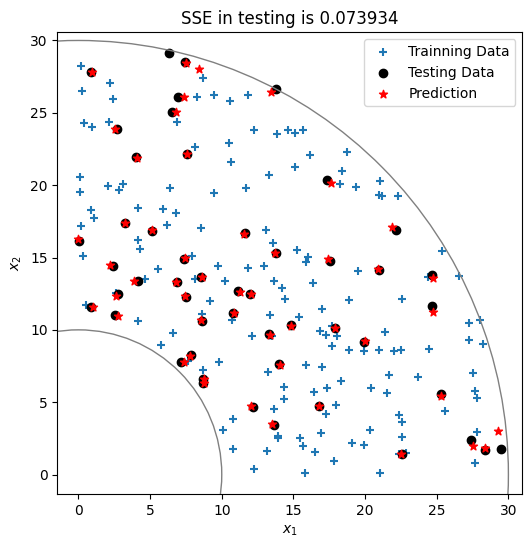

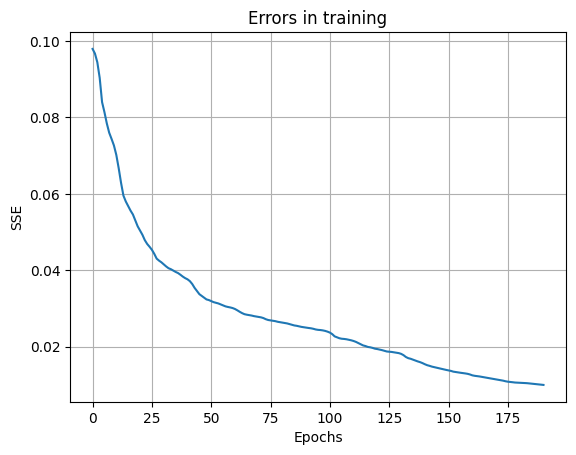

In [5]:
import neurolab as nl
from sklearn.model_selection import train_test_split
l1, l2 = 20, 10
n = 1000
center = np.array([0,0])
radius_in,radius_out = 10,30
p = randsphere(center,radius_out, n)
p = p[(p[:,0]>0) & (p[:,1]>0),:]
d = np.sum(p**2,axis=1)
p = p[d>=radius_in**2,:]
x1,x2=p[:,0],p[:,1]
x_train, x_test,y_train,y_test=train_test_split(x1,x2,test_size=0.25)
theta2 = np.arccos((x_train**2+y_train**2-l1**2-l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train)-np.arctan(l2 *np.sin(theta2)/(l1+l2*np.cos(theta2)))
fig =plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train,y_train,marker='+',label='Trainning Data')
ax.scatter(x_test,y_test,color='k',marker='o',label='Testing Data')
ax.add_artist(plt.Circle(center,radius_out,fill=False,color='0.5'))
ax.add_artist(plt.Circle(center,radius_in,fill=False,color='0.5'))
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.eps", format='eps')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
# plt.savefig(img_dir + "neurolab_20_err.eps", format='eps')
plt.show()

In [6]:
InputX = p # inputs: N x 2 
theta2 = np.arccos((p[:,0]**2 + p[:,1]**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(p[:,1]/p[:,0]) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
OutputY = np.c_[theta1, theta2] # output: N x 2


# create network
hidden_output_layers = [20, 2]#[hidden layers,output layer]
# set up activation functions for each hidden layer and output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()]
net = nl.net.newff([[p[:,0].min(), p[:,0].max()], [p[:,1].min(), p[:,1].max()]],size = hidden_output_layers,transf=transf)
#set up traning func
net.trainf = nl.train.train_bfgs
# net.trainf = nl.train.train_cg 
# # net.trainf = nl.train.train_gd 
# # net.trainf = nl.train.train_gdx
# start training
print(net.trainf)
err = net.train(InputX, OutputY, epochs = 5000,  show = 100, goal = 0.01)#5000次 分批批次的batch
# Calculate fitted or prediction values
OutputY_hat = net.sim(InputX)

Trainer(TrainBFGS)
Epoch: 100; Error: 0.18332818419421537;
Epoch: 200; Error: 0.04879887931977367;
Epoch: 300; Error: 0.029664267202039785;
Epoch: 400; Error: 0.022464289422167976;
Epoch: 500; Error: 0.019712940860102453;
Epoch: 600; Error: 0.018264675823748446;
Epoch: 700; Error: 0.017056371676526787;
Epoch: 800; Error: 0.01634231334583485;
Epoch: 900; Error: 0.0156993254386815;
Epoch: 1000; Error: 0.012929336518476275;
Epoch: 1100; Error: 0.011051386198357712;
The goal of learning is reached


# 圖像辨識

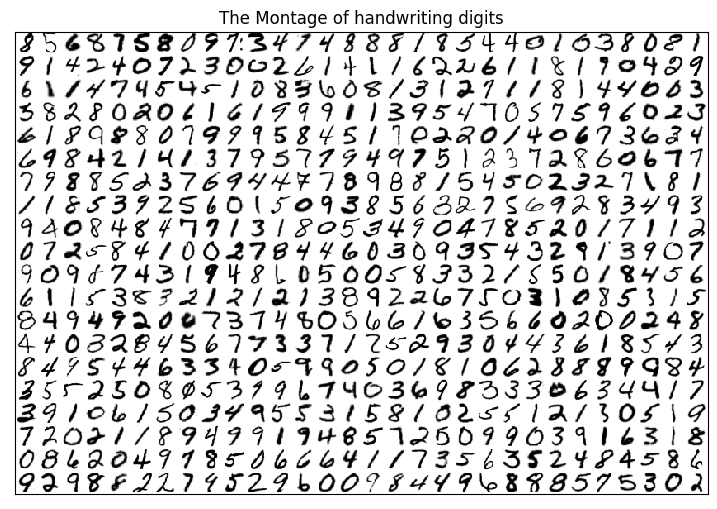

In [11]:
from scipy.io import loadmat
data_dir = '../ml_data/digits_train/'
D = loadmat(data_dir + 'Digits_train.mat')  # D.keys()
X = D['X']  # images
y = D['y']  # labels: single output in 0~9
plt.figure(figsize=(9, 6))
# prepare and diaplay a montage of digit images
n, m = 20, 30  # Anxmmontage(totalmnimages)
sz = np.sqrt(X.shape[1]).astype('int')  # image size sz x sz
M = np.zeros((m*sz, n*sz))  # montage image
A = X[:m*n,:]  # show the first nm images
# Arrange images to form a montage
for i in range(m):#把一列一列的圖片資訊，reshape成圖 一個一個排
    for j in range(n):
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = A[i*n+j, :].reshape(sz, sz)
plt.imshow(M.T, cmap=plt.cm.gray_r, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()


In [9]:
print(A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

N=2000
X_=np.array(X)[:N,:]
y_=np.array(y)[:N,:]
# prepare data
X_train, X_test, y_train, y_test =  train_test_split(X_/255, y_.ravel(), test_size = 0.25)
# setup and run
hidden_layers = (30,) # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = True, activation = 'logistic', tol = 1e-6, random_state = 0) 
# default activation = ’relu’ tol=10^-6 training loss 10次變化小於此數為終點 #verbose跑出過程
clf.fit(X_train, y_train) 
y_test_hat = clf.predict(X_test)


Iteration 1, loss = 2.31555372
Iteration 2, loss = 2.23912822
Iteration 3, loss = 2.17507681
Iteration 4, loss = 2.11621518
Iteration 5, loss = 2.06134780
Iteration 6, loss = 2.00747517
Iteration 7, loss = 1.95595074
Iteration 8, loss = 1.90879726
Iteration 9, loss = 1.86272316
Iteration 10, loss = 1.81942223
Iteration 11, loss = 1.77829610
Iteration 12, loss = 1.73835201
Iteration 13, loss = 1.70023891
Iteration 14, loss = 1.66244810
Iteration 15, loss = 1.62632188
Iteration 16, loss = 1.59158919
Iteration 17, loss = 1.55694383
Iteration 18, loss = 1.52342500
Iteration 19, loss = 1.49057744
Iteration 20, loss = 1.45839647
Iteration 21, loss = 1.42720305
Iteration 22, loss = 1.39616837
Iteration 23, loss = 1.36623591
Iteration 24, loss = 1.33682924
Iteration 25, loss = 1.30789748
Iteration 26, loss = 1.27983175
Iteration 27, loss = 1.25258337
Iteration 28, loss = 1.22533098
Iteration 29, loss = 1.19892473
Iteration 30, loss = 1.17314461
Iteration 31, loss = 1.14814491
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


acucracy by score for tested data: 97.6000%


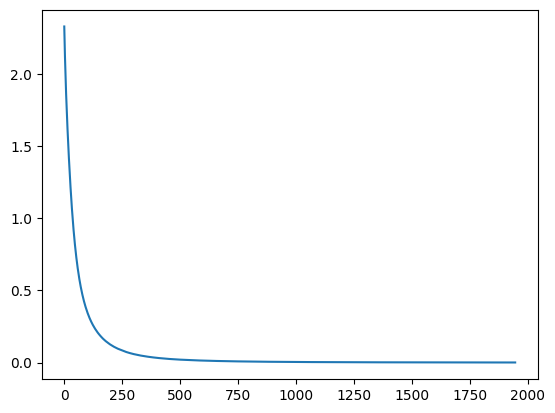

In [ ]:
print("acucracy by score for tested data: {:.4f}%".format(100* clf.score(X,y)))
plt.plot(clf.loss_curve_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


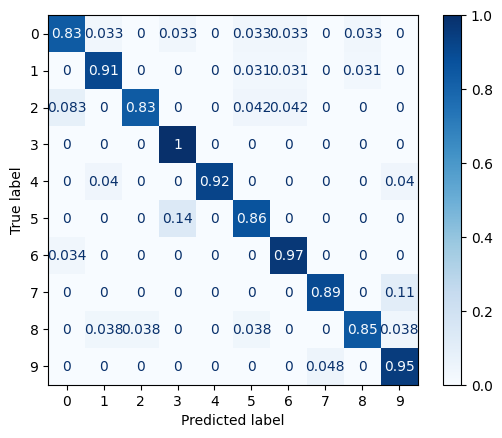

In [ ]:
from sklearn.metrics import plot_confusion_matrix
score = clf.score(X_test, y_test)
# Confusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')